# **Telecom Customer Churn Prediction Project**

------------------------
# Tabel of contents

1- [Introduction](#1--Introduction)  
2- [Loading Libraries and Data](#2--Loading-Libraries-and-Data)  
3- [Data Understanding](#3--Data-Understanding)  
4- [Data Cleaning](#4--Data-Cleaning)  
5- [Exploratory Data Analysis](#5--Exploratory-Data-Analysis) 
* [Bussiness Insightes](#Bussiness-Insightes:)
* [Data Preparation](#Data-Preparation:)
* [EDA for Machine Learning](#EDA-for-Machine-Learning:)
* [Key Insights](#Key-Insights)
* [Recommenditions](#Recommenditions)

6- [Data Preprocessing and Feature Engineering](#6--Data-Preprocessing-and-Feature-Engineering)   
7- [Machine Learning Modeling](#7--Machine-Learning-Modeling)  
*  [KNN](#KNN)
*  [Random Forest](#Random-Forest)

8- [Summary](#8--Summary)  


--------------------------
# 1- Introduction
<a id="Introduction"></a>


### Objective:

We will briefly describe the project's goal of predicting customer churn in the telecom industry.

### Business Problem:

In this Project, we will try to explain why churn prediction is important and how it can help the business retain customers.

--------------------------
# 2- Loading Libraries and Data
<a id="Loading-Libraries-and-Data"></a>

### Importing Libraries:

In [82]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white') 
%matplotlib inline
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default='iframe'

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model building and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import the required function
from scipy.stats import chi2_contingency,wilcoxon, mannwhitneyu, skew
from scipy.stats import chi2_contingency 
from itertools import combinations
import scipy.stats as ss

# Display plots inline
%matplotlib inline

# Configure seaborn
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore') 

### Loading Data:

In [83]:
# Load the CSV file
url = 'https://raw.githubusercontent.com/ahosnyyy/capstone_project/refs/heads/main/data/telco-customer-churn.csv'
df = pd.read_csv(url)

----------------------
# 3- Data Understanding
<a id="Data-Understanding"></a>

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [84]:
# removing the max columns limit to better read the data
pd.set_option('display.max_columns', None)
df.head()      # Display the first few rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Next, we will check the structure of the dataset, including data types and missing values.

In [85]:
# Check data structure
df.shape

(7043, 21)

### Data Overview:

 The dataset contains information about **7,043** telecom customers and their service usage patterns, demographics, and whether they churned or not. It has **21** columns, covering aspects like customer demographics, account details, services they have subscribed to, and their churn status. **Below are some key features:**

*  **Customer Information:**

   * `customerID`: Unique identifier for each customer.
   * `gender`: Gender of the customer (Male/Female).
   * `SeniorCitizen`: Whether the customer is a senior citizen (1 for Yes, 0 for No). 
   * `Partner` and `Dependents`: Whether the customer has a partner or dependents.   

* **Service Information:**
  * `PhoneService`, `MultipleLines`: Whether the customer has phone service and multiple lines.
  * `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`: Various internet services and support options the customer uses.

* **Account Information:**

  * `Contract`: Type of contract the customer has (Month-to-month, One year, Two years).
  * `PaperlessBilling`: Whether the customer has opted for paperless billing.
  * `PaymentMethod`: The customer’s method of payment (e.g., Electronic check, Mailed check).
  * `MonthlyCharges` and `TotalCharges`: Monthly and total charges for the customer.
  * `tenure`: Indicates the total amount of months that the customer has been with the company.

* **Target Variable:**

  * `Churn`: Whether the customer churned (Yes/No).
  
This dataset is well-suited for churn prediction, providing various service and account attributes that can be used to understand patterns in customer churn.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [88]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [89]:
df.describe()    # Summary statistics for numerical features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
# Check for Null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Checking duplicates**

In [91]:
duplicates = df.duplicated()
print(duplicates.sum())  # This will show the total number of duplicate rows

0


--------------------------
# 4- Data Cleaning
<a id="Data-Cleaning"></a>

From the initial data overview, we can find some indirect missingness in our data (which can be in form of blank spaces), particularly `TotalCharges`.  
The column `TotalCharges` might be of type `object` instead of `float` due to the presence of missing or bad data.  
Let's see that !

In [92]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # coerce => If the data null will put NAN instead of error

In [93]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Here we see that the TotalCharges has **11** missing values. Let's check this data.

In [94]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- It can also be noted that the `Tenure` column is `0` for these entries even though the `MonthlyCharges` column is not empty.  
Let's see if there are any other `0` values in the `tenure` column.

In [95]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the `Tenure` column.  
- Let's delete the rows with missing values in `TotalCharges` columns since there are only **11** rows and deleting them will not affect the data.

In [96]:
# Drop rows where TotalCharges has missing values (NaN)
df.dropna(subset=['TotalCharges'], inplace=True)

# Verify if any missing values remain
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

------------------------
# 5- Exploratory Data Analysis
<a id="Exploratory-Data-Analysis"></a>

## Bussiness Insightes:
<a id="Bussiness-Insightes:"></a>

### Overview of the Dataset

- Description for summary statistics for numerical features after updating data types.

In [97]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### **A) Distribution of Target Variable (`Churn`)**
  
We will analyze the distribution of the target variable, `Churn`, to understand if the dataset is balanced or imbalanced.

In [98]:
main_color = ['#26577C','#E55604','#CDC2AE','orange','#867070']
df_t = df['Churn'].value_counts().reset_index().set_axis(['Churn','Count'],axis=1)
df_t['Churn'] = df_t['Churn'].replace({0:'Not Churn',1:'Churn'})
z = [main_color[0],main_color[1]]
fig = go.Figure(data=[go.Pie(labels=df_t['Churn'], values=df_t['Count'], hole=.3)]
            ).update_layout(height=550,title={'text': 'Customer Churn','y':0.96,'x':0.485,'xanchor': 'center','yanchor': 'top'},font=dict( size=15), template='plotly_white'
                            ).update_traces(marker=dict(colors=z))
fig.show()

**Notes:**   
- The dataset is somewhat imbalanced, with a significantly higher number of customers who did not churn (73.4 %).
- This imbalance is common in customer churn datasets but We will have to take that into account while splitting the dataset.


--------------------------
**Functions**

In [99]:
## I will put some functions here so as not to interfere

# function to calculate categorical data association
def get_corr_mat(df, f=chi2_contingency):
    columns = df.columns
    dm = pd.DataFrame(index=columns, columns=columns)
    for var1, var2 in combinations(columns, 2):
        cont_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat = cramers_v(cont_table.values)
        dm.loc[var2, var1] = chi2_stat
        dm.loc[var1, var2] = chi2_stat
    dm.fillna(1, inplace=True)
    return dm

def cramers_v(confusion_matrix):
    """ Calculate Cramer's V statistic for categorical-categorical association. """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#################################################################################

# Categorical data visualization function
def cat_viz(list_of_var):
    bucket1 = [] 
    bucket2 = []
    bucket3 = []
    bucket4 = []
    
    for i in list_of_var:
        bucket1 = bucket1 + [i] * len(df[i].unique())
        for y in df[i].unique():
            bucket2.append(y)
            bucket3.append(df[(df['Churn'] == 'Yes') & (df[i] == y)][i].count())
            bucket4.append(df[(df['Churn'] == 'No') & (df[i] == y)][i].count())
    
    bucket5 = []
    for i, j in zip(bucket4, bucket3):
        bucket5.append([round((i / (i + j)) * 100, 2), round((j / (i + j)) * 100, 2)])
    
    fig = go.Figure()

    # Not Churn
    fig.add_trace(go.Bar(
        x=[bucket1, bucket2], 
        y=bucket4, 
        marker_color=main_color[0], 
        name="Not Churn", 
        text=[f"{j}<br>%{i[0]}" for i, j in zip(bucket5, bucket4)]
    ))

    # Churn
    fig.add_trace(go.Bar(
        x=[bucket1, bucket2], 
        y=bucket3, 
        marker_color=main_color[1], 
        name="Churn", 
        text=[f"{j}<br>%{i[1]}" for i, j in zip(bucket5, bucket3)]
    ))

    fig.update_layout(title_text="Categorical Data vs Churn", 
                      title_x=0.5, template='plotly_white')

    # Correlation matrix for the categorical variables
    cat_corr = get_corr_mat(df[list_of_var + ['Churn']])
    
    # Plot the heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(cat_corr, annot=True, fmt='.2f', square=True, cmap='Spectral')
    plt.show()

    return fig

#########################################################################################

# Numerical data visualization function
def num_viz(var):
    skew_ = round(skew(df[var], bias=False), 3)
    
    fig = px.histogram(
        df, 
        x=var,
        marginal="box", 
        hover_data=df.columns, 
        color='Churn',
        color_discrete_map={'No': main_color[0], 'Yes': main_color[1]}
    ).update_layout(
        autosize=True,
        height=360, 
        width=900,
        margin=dict(l=0, r=20, b=0, t=30, pad=10),
        title_text=f"<b>{var} | Skewness: {skew_}",
        title_x=0.5, 
        template='plotly_white'
    )
    return fig

-----------------------------
### **B) Demographics**

- This analysis refers to customers. We will analyze **customer information** to discover the correlations and relation to `churn`.

#### Demographic features are all categorical:  

`gender`, `SeniorCitizen`, `Partner`, `Dependents`

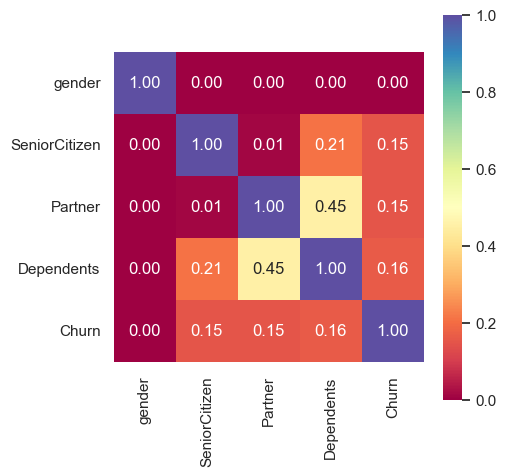

In [100]:
cat_viz(['gender', 'SeniorCitizen', 'Partner', 'Dependents']).show()

**Notes**  

- The proportion of Gender between Male and Female towards Churn looks identical, Gender has no association with customers who will churn or not.
- It can be observed that the fraction of senior citizen is very less.
- Senior Citizens are much more likely to churn.
- Customers without partner are more likely to churn.
- Customers who do not have dependents are more likely to churn.


### **C) Service** 

- This analysis refers to `Service`. We will analyze service information to discover the correlations and relation to `churn`.

#### All Features are categorical:

`PhoneService`,`MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`

In [101]:
# List of service-related columns
serv = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

map_serv = {'Yes':1,'No':0,'No phone service':0,'DSL':1,'Fiber optic':1,'No internet service':0}


# Data frame for visualization of Count of Services usage
df_serv = pd.DataFrame(pd.DataFrame([df[i].map(map_serv) for i in serv]).T.sum(axis=0)).reset_index().set_axis(
    ['Services','Count'], axis=1).sort_values(by='Count', ascending=False, ignore_index=True)

# Highlight the top 3 services
df_serv['Color'] = main_color[0]
df_serv['Color'][:3] = main_color[1]  # highlight top 3 services

# Visualization of Count of Services usage
fig = go.Figure([go.Bar(y=df_serv['Services'], x=df_serv['Count'],
                        text=[f'{i} ({j}%)' for i, j in zip(df_serv['Count'], 
                        [round((i / df_serv['Count'].sum()) * 100, 2) for i in df_serv['Count']])],
                        textposition='outside',
                        marker={'color': df_serv['Color']},
                        orientation='h')])

# Update layout
fig.update_layout(autosize=True,
                  height=500,
                  margin=dict(l=10, r=10, b=10, t=40, pad=0),
                  xaxis_range=[0, df_serv['Count'].max() + (df_serv['Count'].max() / 2)],
                  template='plotly_white',
                  title=dict(text='Count of Services Usage', font=dict(size=20), x=0.5),
                  yaxis={'categoryorder': 'array', 'categoryarray': df_serv.sort_values(by='Count', ascending=True)['Services'].to_list()})

# Show the figure
fig.show()


**Notes**  

- `PhoneService`, `InternetService`, and `MultipleLines` are the 3 most popular services, next we will try to find out how these three variables relate to `churn`

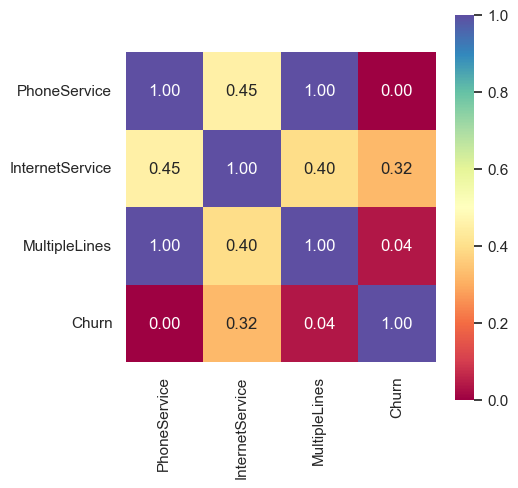

In [102]:
cat_viz(['PhoneService','InternetService','MultipleLines']).show()

**Notes**  
- Customers who use fiber optic internet services have a high chance of Churn.

In [103]:
#cat_viz(['StreamingMovies','StreamingTV', 'OnlineBackup']).show()

In [104]:
#cat_viz(['DeviceProtection', 'TechSupport', 'OnlineSecurity']).show()

### D) Account 
- These analysis refers to `customer Account` and the process he follow to use the service. We will analyze Account information to discover the correlations and relation to `churn`.



#### For categorical features 

`Contract`,  `PaymentMethod`, `PaperlessBilling`

In [105]:
custom_colors = ['#26577C','#E55604','#CDC2AE'] 

fig = px.histogram(df, 
                   x="Churn", 
                   color="Contract", 
                   barmode="group", 
                   title="<b>Customer Contract Distribution<b>",
                   color_discrete_sequence=custom_colors)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()


**Notes** 
- About `75%` of customer with Month-to-Month Contract opted to move out as compared to `13%` of customrs with One Year Contract and `3%` with Two Year Contract.

In [106]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

custom_colors_2 = ['#26577C','#E55604','#CDC2AE','orange'] 

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, 
                             marker=dict(colors=custom_colors_2))])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [107]:
custom_colors_3 = {
    'Electronic check': '#26577C',
    'Mailed check': '#E55604',
    'Bank transfer (automatic)': '#CDC2AE',
    'Credit card (automatic)': 'orange'
}

fig = px.histogram(df, 
                   x="Churn", 
                   color="PaymentMethod", 
                   title="<b>Customer Payment Method distribution w.r.t. Churn</b>", 
                   color_discrete_map=custom_colors_3)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()


**Notes:**  
- Major customers who moved out were having Electronic Check as Payment Method.
- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [108]:
color_map = {"Yes": '#26577C', "No": '#E55604'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Notes:**  
- Customers with Paperless Billing are most likely to churn.


#### For Numerical features:

In [109]:
num_viz('tenure').show()

**Notes:**
- New customers are more likely to churn.

In [110]:
num_viz('MonthlyCharges').show()

**Notes:**  
- Customers with higher Monthly Charges are also more likely to churn.

In [111]:
num_viz('TotalCharges').show()

**Notes:**
- If we look at the marginal boxplot visualization above, it can be seen that `tenure` and `MonthlyCharges` do not have different data distribution shapes,  
  This is one indication that this feature will be a good predictor.

## Data Preparation:
<a id="Data-Preparation:"></a>

### A) Checking the Unique Values for Object Features:

In [112]:
# Select only object columns
object_columns = df.select_dtypes(include=['object'])

# Get unique values and their counts for each object column
unique_values_info = {col: {
    "unique_values": object_columns[col].unique(),
    "num_unique": object_columns[col].nunique()
} for col in object_columns.columns}

# Print the unique values and their counts
for column, info in unique_values_info.items():
    print(f"Unique values in '{column}':")
    print(info["unique_values"])
    print(f"Number of unique values: {info['num_unique']}")
    print()  # Print a new line for better readability

Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Number of unique values: 7032

Unique values in 'gender':
['Female' 'Male']
Number of unique values: 2

Unique values in 'Partner':
['Yes' 'No']
Number of unique values: 2

Unique values in 'Dependents':
['No' 'Yes']
Number of unique values: 2

Unique values in 'PhoneService':
['No' 'Yes']
Number of unique values: 2

Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']
Number of unique values: 3

Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']
Number of unique values: 3

Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']
Number of unique values: 3

Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']
Number of unique values: 3

Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']
Number of unique values: 3

Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']
Number of unique va

### B) Standardizing Categorical Features for Consistency:

- In the `OnlineSecurity` and Similar Features, we observed three unique values:
  - **Yes**: Indicates the customer has OnlineSecurity.
  - **No**: Indicates the customer does not have OnlineSecurity.
  - **No internet service**: Indicates the customer does not have any Internet service.

- To enhance data consistency:
  - We will replace the **No internet service** value with **No**, as it aligns with the binary nature of the feature.
  - This transformation will improve the clarity and usability of the data for analysis and machine learning models.

- Additionally, since we have a separate column **InternetService** that indicates whether the customer has internet service, standardizing these values helps maintain uniformity across related features.

In [113]:
df.loc[df['InternetService'] == 'No', 
                     ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 
                      'StreamingMovies']]

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...,...
7017,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7019,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7020,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7030,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


- Similar to the `MultipleLines` feature case we are appling the same solution to the similar features

In [114]:
# List of columns to replace 'No internet service' and 'No phone service:' with 'No'
columns_to_replace = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Replace 'No internet service' with 'No' in specified columns
for column in columns_to_replace:
    df[column] = df[column].replace({'No internet service': 'No', 'No phone service': 'No'})

### C) Convert Binary Categorical Variables:

In [115]:
# Convert 'Yes'/'No' columns to 0 and 1
binary_columns = [
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'Churn'
]

# Mapping Yes/No to 1/0
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert 'gender' column separately
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Check data types
print(df.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


-------------------------
## EDA for Machine Learning:
<a id="EDA-for-Machine-Learning:"></a>

In [116]:
# Deviding the data into two groups by creating two masks to easly select them 
churn = df['Churn'] == 1
no_churn = df['Churn'] == 0

In [117]:
# Displaying the mean for numeric features, to cross-examine them according to churn status.
means = [df[churn].mean(numeric_only=True),df[no_churn].mean(numeric_only=True)]
pd.DataFrame(means, index=['churn', 'no_churn'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
churn,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.749064,74.441332,1531.796094,1.0
no_churn,0.507263,0.128995,0.527600,0.343405,37.650010,0.901220,0.410033,0.333140,0.368390,0.362774,0.335077,0.365873,0.370521,0.536122,61.307408,2555.344141,0.0


--------------------------
**Functions**

In [118]:
# making a function to plot a histogram for each group against 1 feature
def hist_1d(df, col_name, title= None, xlabel= None, ylabel=None):
    
    df[col_name][no_churn].hist(alpha=0.7, label= 'No churn', color= '#26577C');
    df[col_name][churn].hist(alpha=0.7, label= 'churn', color= '#E55604');
    
    # title and labels
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel,fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    
    # legend
    plt.legend();

In [119]:
# making a function to plot a bar chart for each group against 2 variables
def bar_2d(df, x_col_name, y_col_name, title= None, xlabel= None, ylabel=None):
    
    df[no_churn].groupby(x_col_name)[y_col_name].mean().plot(kind='bar', color='#26577C', alpha=0.7, label= 'No churn');
    df[churn].groupby(x_col_name)[y_col_name].mean().plot(kind='bar', color='#E55604', alpha=0.7, label= 'churn');
    
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel,fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.legend();
    plt.grid(visible=True);

In [120]:
# making a function to plot a bar chart of the proportion of each group against 1 feature
def plot_proportions(df, col_name, width, title= None, xlabel= None, ylabel=None):
    counts = df.groupby(['Churn', col_name]).count().sort_index().iloc[:,0]
    total_counts = df.groupby('Churn').count().sort_index().iloc[:,0]
    churn_proportions = counts[1] / total_counts[1]
    no_churn_proportions = counts[0] / total_counts[0]
    category_devider = np.arange(len(no_churn_proportions))
    

    # plot bars
    no_churn_bars = plt.bar(category_devider, no_churn_proportions, width, alpha=1, label= 'No churn', color= '#26577C')
    churn_bars = plt.bar(category_devider + width, churn_proportions, width, alpha=1, label= 'Churn', color= '#E55604')

    # title and labels
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel,fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.grid(visible= True);
    locations = category_devider + width / 2  # xtick locations
    labels = np.sort(df[col_name].unique())  # xtick labels
    plt.xticks(locations, labels)

    # legend
    plt.legend();

------------------------

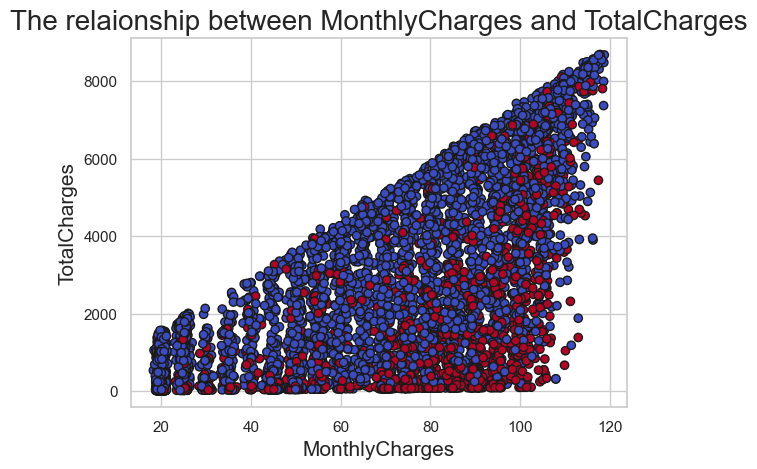

In [121]:
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], c= df['Churn'], cmap= 'coolwarm',edgecolors='k')
plt.title('The relaionship between MonthlyCharges and TotalCharges', fontsize = 20)
plt.xlabel('MonthlyCharges',fontsize = 15)
plt.ylabel('TotalCharges', fontsize = 15)
plt.grid(visible=True);
plt.show()

**Notes:**
- Most churned customers have high monthly charges but low total charges, this means that they churn early in thier tenure.

In [122]:
#grouping customers' tenures into 4 quantiles 
df['tenure_bins'] = pd.qcut(df['tenure'].sort_values(), q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

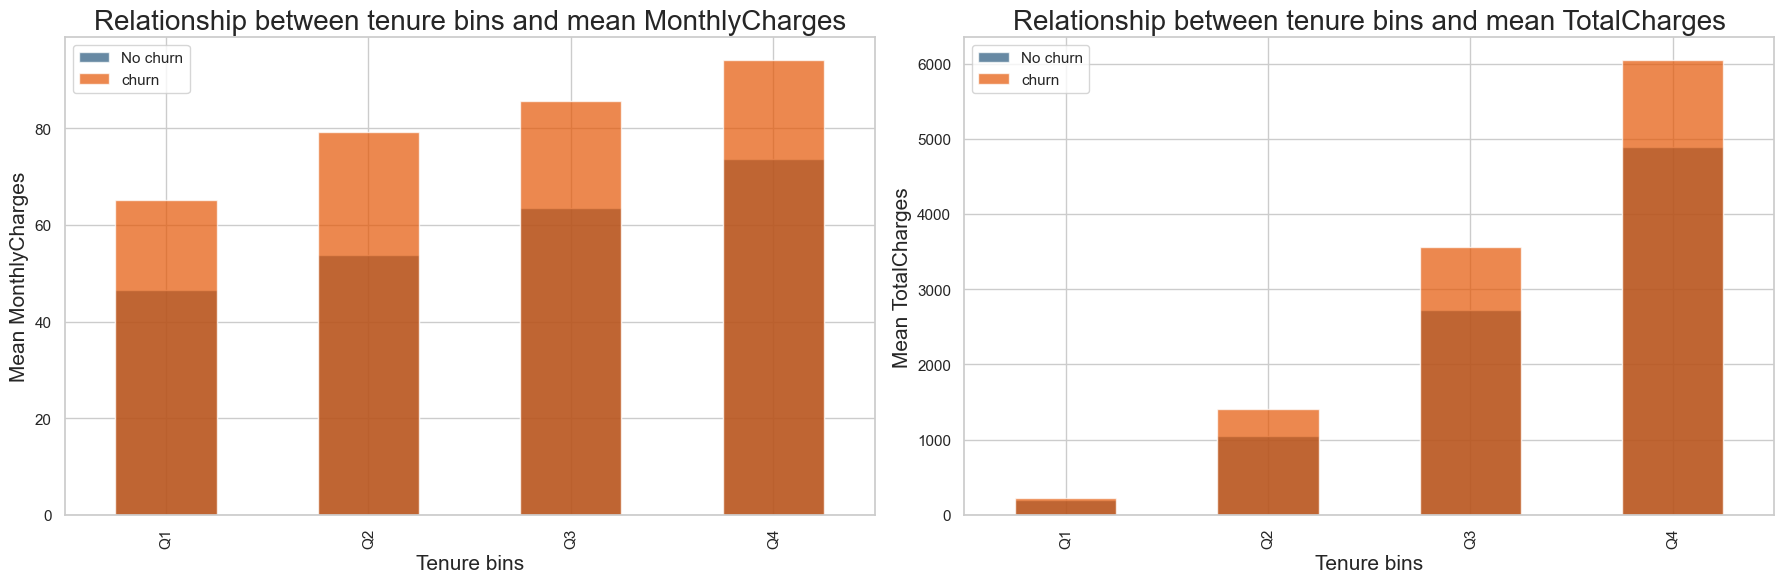

In [123]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
bar_2d(df, 'tenure_bins', 'MonthlyCharges', 'Relationship between tenure bins and mean MonthlyCharges', 'Tenure bins', 'Mean MonthlyCharges')
plt.subplot(1, 2, 2)
bar_2d(df, 'tenure_bins', 'TotalCharges', 'Relationship between tenure bins and mean TotalCharges', 'Tenure bins', 'Mean TotalCharges')

plt.tight_layout()
plt.show()

**Notes:**
- The average monthly and total charges in churned customer are higher than not-churned customers across all tenure bins,  
**Which means:** as the  customer charges gets higher, the propablity of churn gets higher too

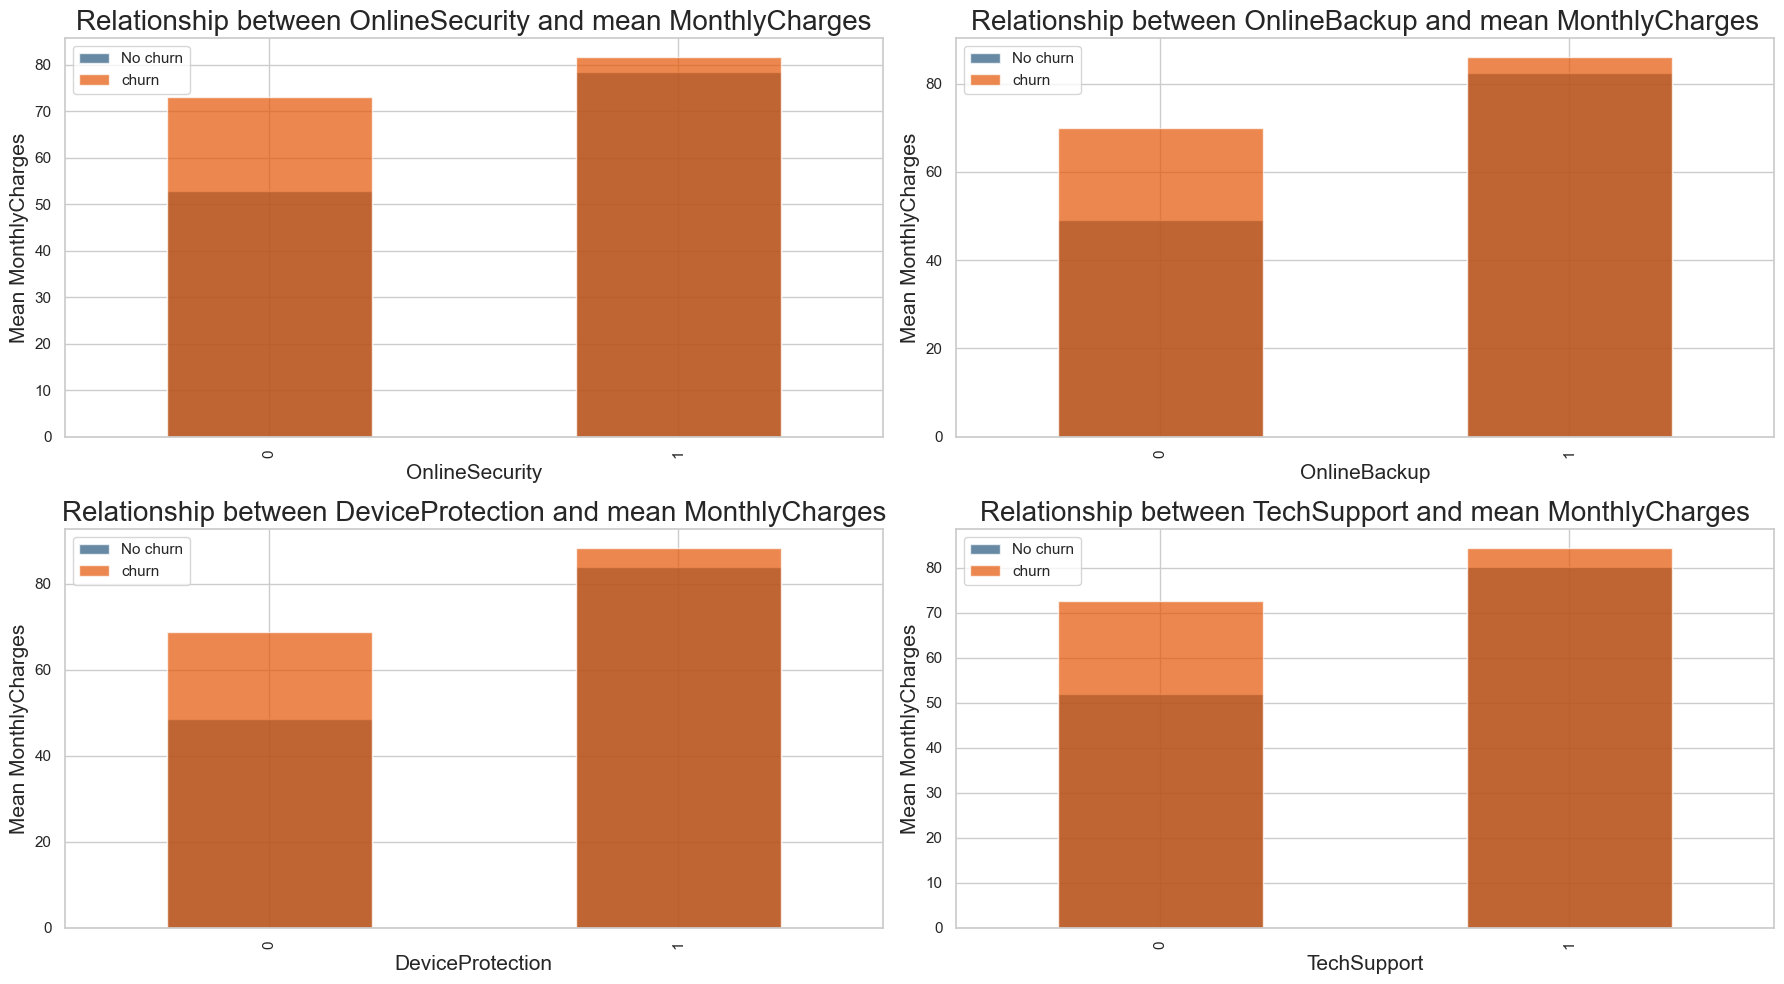

In [124]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
bar_2d(df, 'OnlineSecurity', 'MonthlyCharges','Relationship between OnlineSecurity and mean MonthlyCharges', 'OnlineSecurity', 'Mean MonthlyCharges')
plt.subplot(2, 2, 2)
bar_2d(df, 'OnlineBackup', 'MonthlyCharges','Relationship between OnlineBackup and mean MonthlyCharges', 'OnlineBackup', 'Mean MonthlyCharges')
plt.subplot(2, 2, 3)
bar_2d(df, 'DeviceProtection', 'MonthlyCharges','Relationship between DeviceProtection and mean MonthlyCharges', 'DeviceProtection', 'Mean MonthlyCharges')
plt.subplot(2, 2, 4)
bar_2d(df, 'TechSupport', 'MonthlyCharges','Relationship between TechSupport and mean MonthlyCharges', 'TechSupport', 'Mean MonthlyCharges')


plt.tight_layout()
plt.show()

**Notes:**
- Churn customers that don't subscribe to services on average pay significantly higher than non-churn customers.

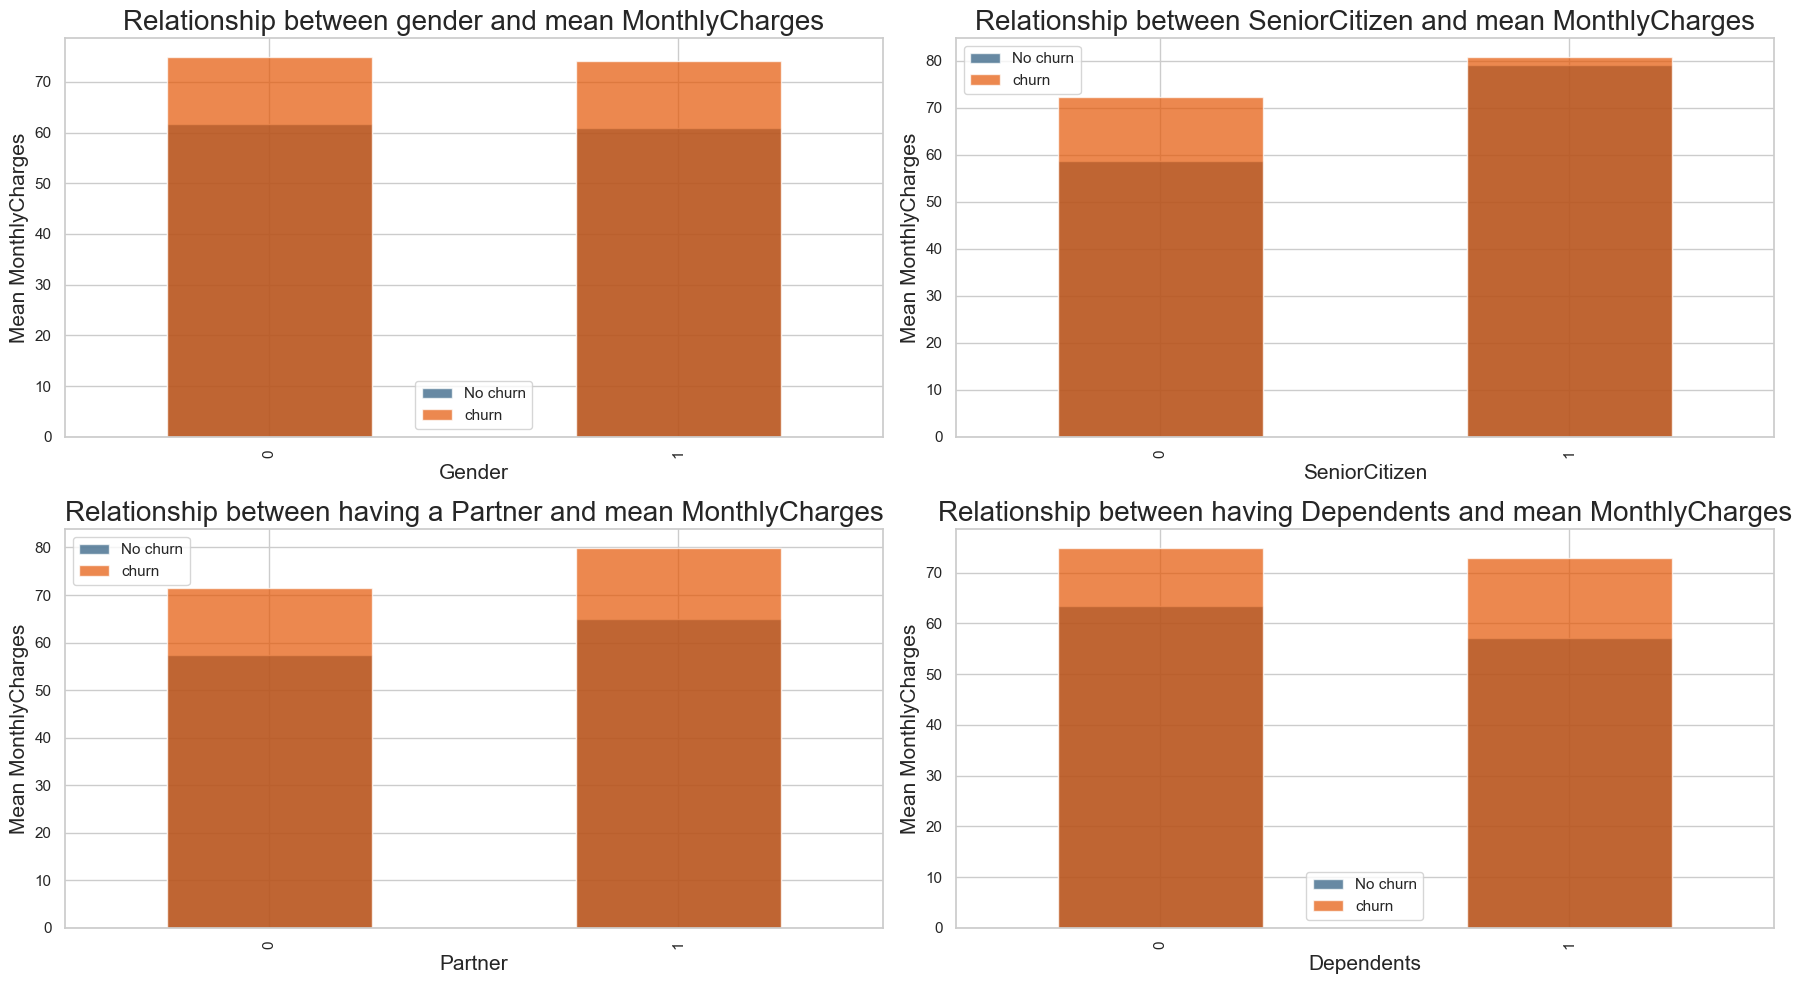

In [125]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
bar_2d(df, 'gender', 'MonthlyCharges','Relationship between gender and mean MonthlyCharges', 'Gender', 'Mean MonthlyCharges')
plt.subplot(2, 2, 2)
bar_2d(df, 'SeniorCitizen', 'MonthlyCharges','Relationship between SeniorCitizen and mean MonthlyCharges', 'SeniorCitizen', 'Mean MonthlyCharges')
plt.subplot(2, 2, 3)
bar_2d(df, 'Partner', 'MonthlyCharges','Relationship between having a Partner and mean MonthlyCharges', 'Partner', 'Mean MonthlyCharges')
plt.subplot(2, 2, 4)
bar_2d(df, 'Dependents', 'MonthlyCharges','Relationship between having Dependents and mean MonthlyCharges', 'Dependents', 'Mean MonthlyCharges')


plt.tight_layout()
plt.show()

**Notes:**
- Mean Monthly Charges are highr for churn customers along all demogarphic metrics,  
**Which indicates** an association between monthly charges and churn

----------------------

### **Key Insights**
<a id='Key-Insights'></a>


-------------

1. **Customer Distribution**:
   - Gender and partner status have no significant effect on churn.
   - Most customers are not senior citizens, and many have dependents.

2. **Service Subscription Patterns**:
   - A small percentage of customers lack phone service.
   - Most customers do not subscribe to optional services like Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, or Streaming Movies.

3. **Churn Characteristics**:
   - **Higher Churn Rates**:
     - Senior citizens, single people, and those without dependents are more likely to churn.
     - Customers using fiber optic internet show the highest churn rates.
     - Customers with month-to-month contracts and paperless billing have significantly higher churn rates.
     - Most churned customers have higher monthly charges but lower total charges, indicating early churn.

   - **Lower Churn Rates**:
     - Yearly or biyearly contract customers are less likely to churn.
     - Customers with online security and related services (e.g., Online Backup, Device Protection, Tech Support) have lower churn rates.
   - **No Significant Impact**:
     - Phone service, multiple lines, and streaming services (TV or movies) do not show significant influence on churn.

4. **Payment and Billing**:
   - Most churned customers use electronic checks, while non-churned customers are evenly distributed across payment methods.
   - Customers with paperless billing are more prone to churn.

5. **Tenure and Charges**:
   - Churn rates decrease as customer tenure increases.
   - Churned customers tend to have higher monthly charges across all demographic groups.
   - Churn likelihood increases with higher monthly and total charges.


### **Recommenditions**
<a id='Recommenditions'></a>
------------

1. **Enhance Customer Retention for Senior Citizens and Singles**:
   - Develop targeted retention programs for senior citizens and single customers, offering incentives like discounts or personalized plans to reduce churn rates in these segments.

2. **Promote Long-Term Contracts**:
   - Encourage customers to switch from month-to-month contracts to longer-term contracts (yearly or biyearly) by offering attractive discounts or bundled services, as longer contracts show lower churn rates.

3. **Increase Value for High-Charge Customers**:
   - Provide more value for customers with higher monthly charges, such as premium services or loyalty rewards. These customers are at a higher risk of early churn, so adding perceived value could improve retention.

4. **Improve Service Uptake**:
   - Highlight the benefits of subscribing to services like Online Security, Tech Support, and Device Protection, as customers who use these services show lower churn rates.

5. **Address Payment Method Issues**:
   - Investigate why electronic check users are more prone to churn and consider offering alternative payment options with better incentives for these customers.

6. **Targeted Campaigns for High-Tenure Customers**:
   - Create targeted campaigns for new customers to reach high-tenure status, as higher tenure correlates with lower churn rates. Focus on providing early value and engagement to retain them longer.

7. **Analyze and Address Billing Preferences**:
   - Assess why paperless billing is associated with higher churn and explore ways to improve the experience for customers using paperless billing, such as more user-friendly payment interfaces or billing transparency.

By addressing these key areas, the company can reduce churn, improve customer satisfaction, and increase long-term revenue.


-----------------------------
## 6- Data Preprocessing and Feature Engineering
<a id='Data-Preprocessing-and-Feature-Engineering'></a>

### One-Hot Encoding and Creating Dummy Variables:

In [126]:
df = df.drop('tenure_bins', axis=1)

In [127]:
# One-hot encode the multi-category columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
# 'drop_first=True' ensures that one category is dropped to avoid multicollinearity
# Convert all boolean columns to integers (True -> 1, False -> 0)
df = df.astype({col: 'int64' for col in df.select_dtypes(include='bool').columns})

In [128]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

In [129]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.440273,0.216155,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.496455,0.411650,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
X= df.drop(['Churn'],axis=1)
y = df['Churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

In [131]:
df_n = df.drop('customerID', axis=1)
plt.figure(figsize=(14,7))
df_n.corr()['Churn'].sort_values(ascending = False)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV                              0.063254
StreamingMovies                          0.060860
MultipleLines                            0.040033
PhoneService                             0.011691
gender                                  -0.008545
DeviceProtection                        -0.066193
OnlineBackup                            -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport                             -0.164716
OnlineSecurity                          -0.171270
Contract_One year                       -0.178225


### Splitting Data:

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
Test_CustomerIDs = X_test['customerID']
X_train.drop(['customerID'],axis=1,inplace=True)
X_test.drop(['customerID'],axis=1,inplace=True)

In [133]:
def distplot(feature, frame, color=main_color[1]):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<Figure size 1400x700 with 0 Axes>

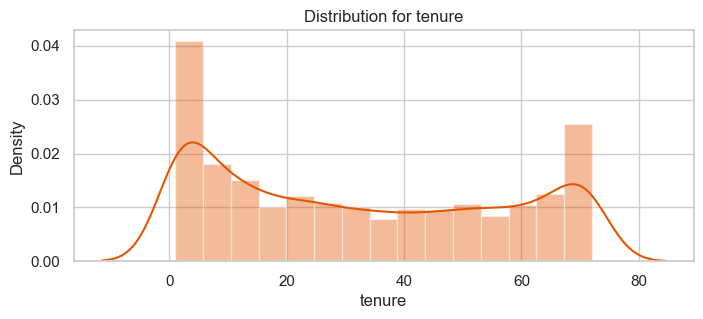

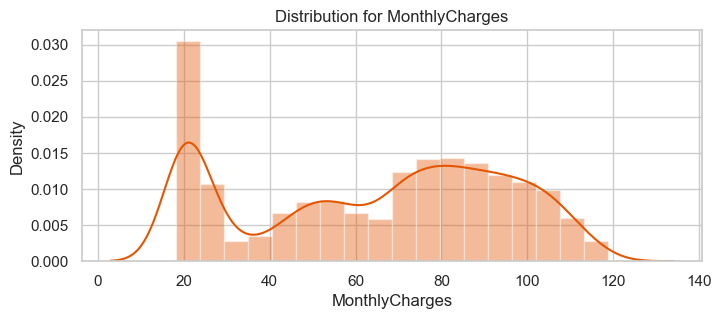

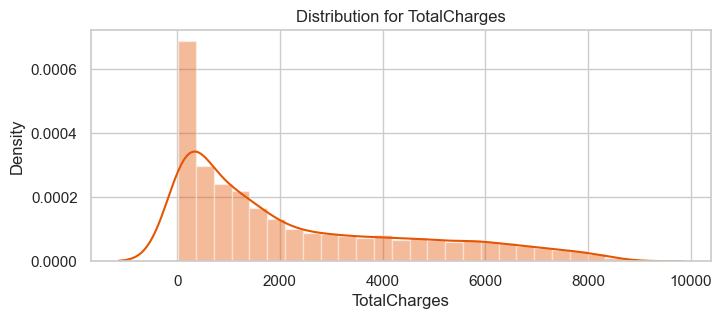

In [134]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)
plt.show()

**Notes:**
- Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

### Scaling Data:

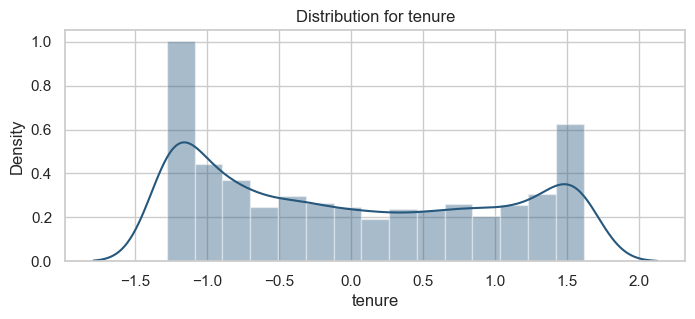

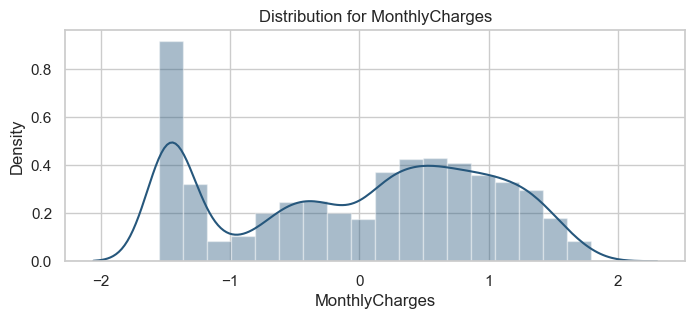

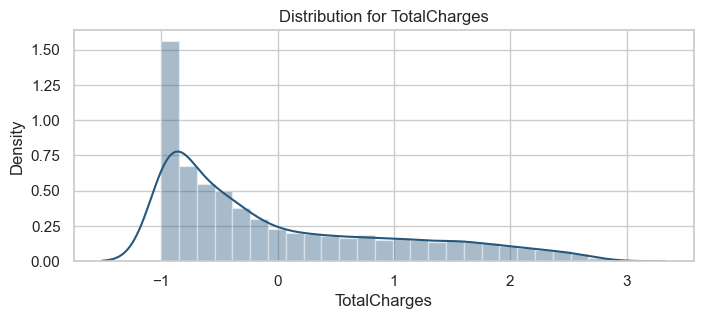

In [135]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color=main_color[0])
plt.show()

In [136]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

--------------
# 7- Machine Learning Modeling
<a id="Machine-Learning-Modeling"></a>

## KNN
<a id="KNN"></a>

In [137]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

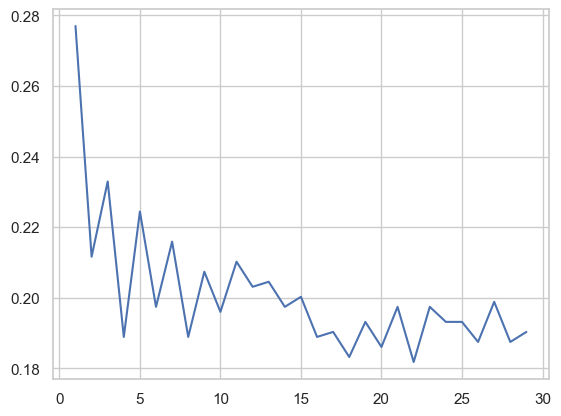

In [138]:
plt.plot(range(1,30),test_error_rates)
plt.show() 

#### Model Evaluation

In [139]:
Final_model = KNeighborsClassifier(n_neighbors=17)
Final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [140]:
y_pred = Final_model.predict(scaled_X_test)
y_pred_proba = Final_model.predict_proba(scaled_X_test)

In [141]:
confusion_matrix(y_test,y_pred)

array([[489,  68],
       [ 66,  81]])

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       557
           1       0.54      0.55      0.55       147

    accuracy                           0.81       704
   macro avg       0.71      0.71      0.71       704
weighted avg       0.81      0.81      0.81       704



#### Predict the non churned Customers who possibly churn:

In [143]:
# Select non-churned customers and remove unnecessary columns
# Ensuring no unexpected columns are passed
nonchurned_customers = df[df['Churn'] == 0].drop(['customerID', 'Churn', 'Churn_Probability'], axis=1, errors='ignore')

# Scale the features
nonchurned_customers_scaled = scaler.transform(nonchurned_customers)

# Predict churn probability for non-churned customers
nonchurned_churn_probabilities = Final_model.predict_proba(nonchurned_customers_scaled)[:, 1]

# Assign churn probabilities to the original DataFrame using .loc
df.loc[df['Churn'] == 0, 'Churn_Probability'] = nonchurned_churn_probabilities

# Display selected columns for non-churned customers
df.loc[df['Churn'] == 0, ['customerID', 'Churn', 'Churn_Probability']].head()

,customerID,Churn,Churn_Probability
0,7590-VHVEG,0,0.529412
1,5575-GNVDE,0,0.058824
3,7795-CFOCW,0,0.000000
6,1452-KIOVK,0,0.411765
7,6713-OKOMC,0,0.235294


#### Using Grid search to choose the best K :

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]
pipe = Pipeline(operations)
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='recall')
full_cv_classifier.fit(X_train,y_train)
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=29))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=29),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 29,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Classification Confusion Metrix

In [145]:
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
heatmap = go.Figure(data=go.Heatmap(
    z=cm,
    x=['Not Churn', 'Churn'],  
    y=['Churn', 'Not Churn'],        
    colorscale='Cividis',
    text=cm,
    texttemplate="%{text}",
    hoverinfo='text'
))

heatmap.update_layout(
    title='RANDOM FOREST CONFUSION MATRIX',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    font=dict(size=14),
    width=700, 
    height=600
)

## Random Forest
<a id="Random-Forest"></a>

#### Feature Selection

- Separates the target variable (y) from the features. It drops the `customerID` and `Churn` columns from the features DataFrame (df2).

In [146]:
# Separate the target variable from the features
y = df['Churn']  # Target
df2 = df.drop(columns=['customerID', 'Churn'])  # Drop non-predictive feature and target

# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df2, drop_first=True)

# Define features
X = df2  # Features

- Applies one-hot encoding to convert categorical columns in df2 into numerical format, removing the first category to avoid multicollinearity.

In [147]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df2, drop_first=True)

- Calculates and Visualizes the correlation matrix of the features to check for multicollinearity using a heatmap.

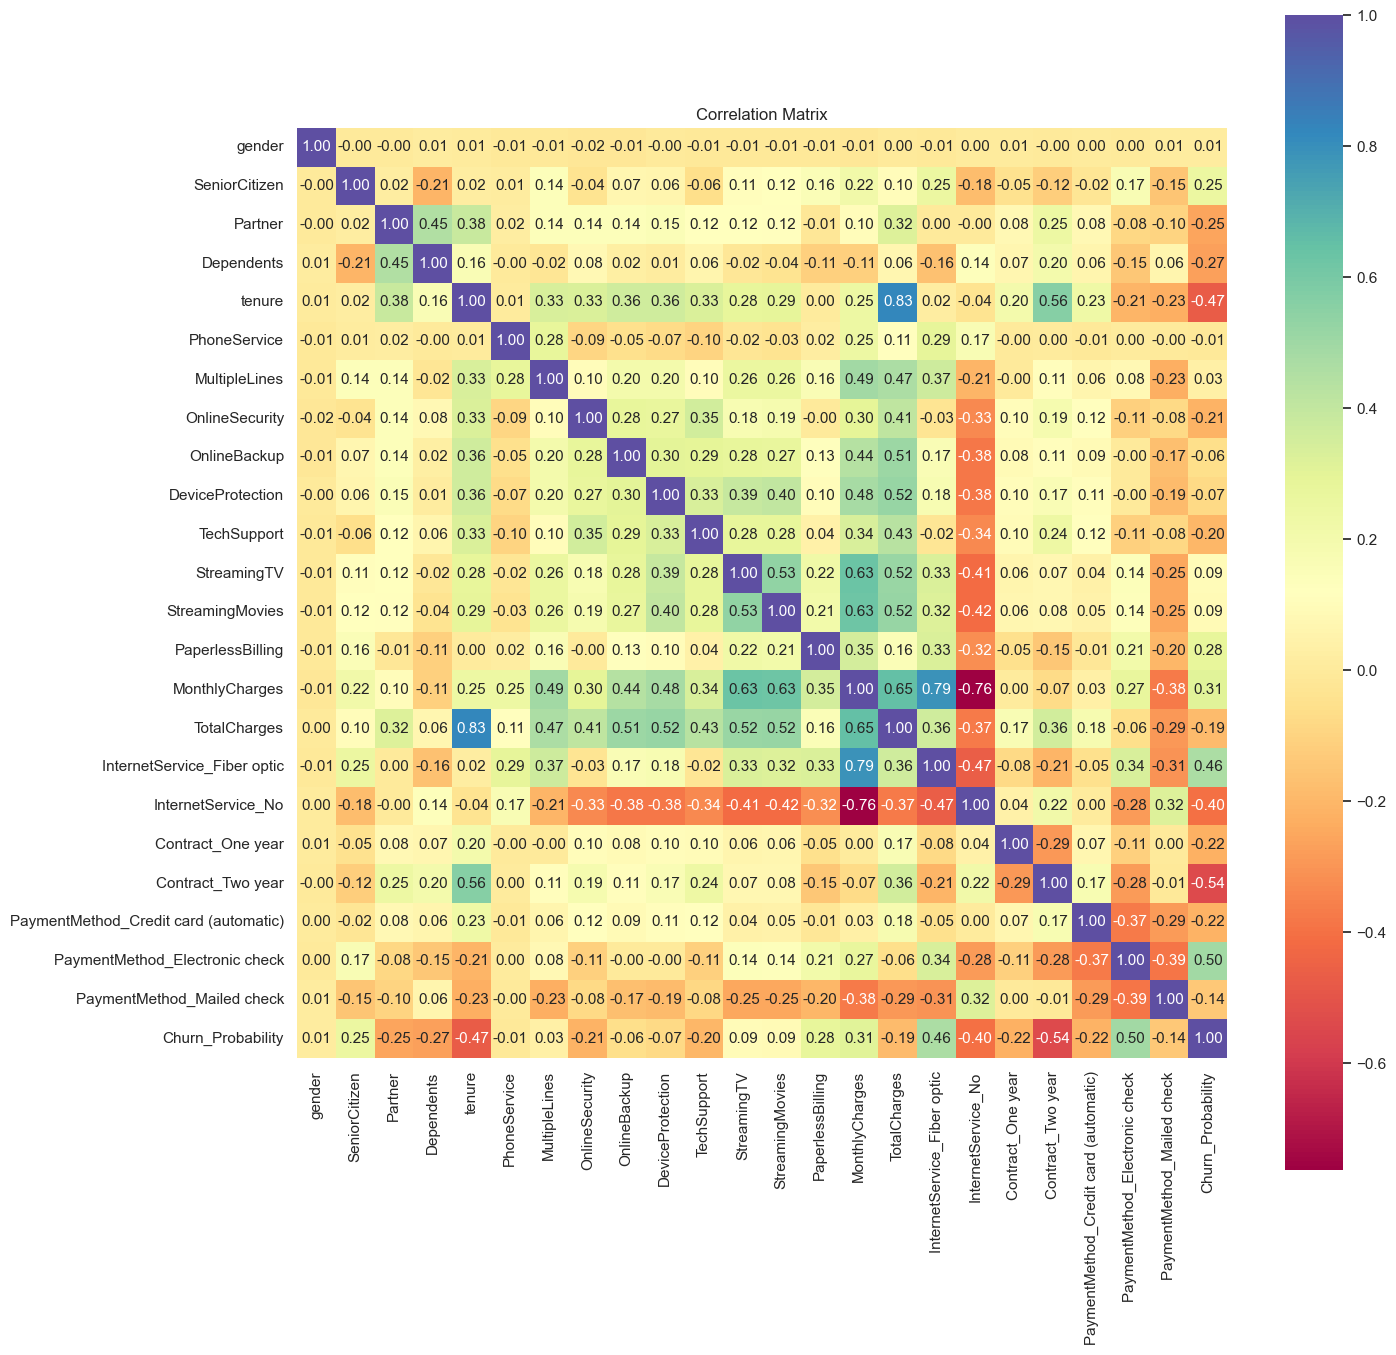

In [148]:
# Step 2: Check for multicollinearity
cmp = 'Spectral'
plt.figure(figsize=(15, 15))
correlation_matrix = X.corr()  # Calculate correlation on the features only
sns.heatmap(correlation_matrix,cbar=True, annot=True, fmt=".2f", square=True, annot_kws={'size': 11}, cmap=cmp)
plt.title('Correlation Matrix')
plt.show()

- Splits the data into training and testing sets, using 30% of the data for testing and 70% for training.

In [149]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

-  Initializes and Fits a `Random Forest classifier` to the training data to obtain feature importances.

In [150]:
# Step 4: Fit the initial Random Forest model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Extracts and Displays the feature importances from the trained Random Forest model, sorting them in descending order.

In [151]:
# Get feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

Feature Importances:
                                   Feature  Importance
23                      Churn_Probability    0.701440
4                                  tenure    0.056676
15                           TotalCharges    0.046635
14                         MonthlyCharges    0.036311
16            InternetService_Fiber optic    0.029252
19                      Contract_Two year    0.023954
21         PaymentMethod_Electronic check    0.022249
17                     InternetService_No    0.012892
18                      Contract_One year    0.009293
7                          OnlineSecurity    0.006911
13                       PaperlessBilling    0.006623
10                            TechSupport    0.005784
1                           SeniorCitizen    0.004826
0                                  gender    0.004523
3                              Dependents    0.004080
6                           MultipleLines    0.003769
2                                 Partner    0.003753
8     

- Selects the features with importance greater than 0.05 and creates a new DataFrame (X_selected) containing only these important features.

In [152]:
# Step 5: Select important features (e.g., importance > 0.05)
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature']
X_selected = X[selected_features]

print("Selected Features:\n", X_selected)

Selected Features:
       Churn_Probability  tenure
0              0.529412       1
1              0.058824      34
2                   NaN       2
3              0.000000      45
4                   NaN       2
...                 ...     ...
7038           0.176471      24
7039           0.058824      72
7040           0.235294      11
7041                NaN       4
7042           0.235294      66

[7032 rows x 2 columns]


#### Random Forest Model Implementation

- Selects relevant features from the DataFrame df, Removes duplicate entries based on customerID, Converts the Churn column to a categorical type,  
  and prints the class distribution of churn.

In [153]:
# Selected features
selected_features = ["customerID", "TotalCharges", "MonthlyCharges", "tenure", "Churn"]

# Filter the data
data_imputed = df[selected_features].drop_duplicates(subset='customerID')
data_imputed['Churn'] = data_imputed['Churn'].astype('category')

# Check the class distribution
print("Class distribution in the original dataset:\n", data_imputed['Churn'].value_counts())

Class distribution in the original dataset:
 Churn
0    5163
1    1869
Name: count, dtype: int64


- Performs a stratified split of the dataset into training and testing sets while maintaining the class distribution of churn.  
   It also removes the `customerID` column from both sets for modeling purposes.

In [154]:
# Stratified split to maintain class distribution
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_index, test_index in sss.split(data_imputed, data_imputed['Churn']):
    train_set = data_imputed.iloc[train_index]
    test_set = data_imputed.iloc[test_index]

# Drop customerID from training and testing sets
train_set = train_set.drop(columns=['customerID'])
test_CIF = test_set['customerID']
test_set = test_set.drop(columns=['customerID'])

- Checks if both classes ('Yes' and 'No') are present in the training set. If one class is missing, it raises an error and prints the class distribution.

In [155]:
# Check if both classes are present after the split
train_set_majority = train_set[train_set['Churn'] == 0]
train_set_minority = train_set[train_set['Churn'] == 1]

# Add a check to ensure both classes are present
if len(train_set_majority) == 0 or len(train_set_minority) == 0:
    print("Class distribution in training set:\n", train_set['Churn'].value_counts())
    raise ValueError("One of the classes is missing in the training set.")

- Upsamples the minority class (customers who churned) so that it matches the size of the majority class (customers who did not churn).  
  The two sets are then concatenated into a new training set.

In [156]:
# Upsample the minority class
train_set_minority_upsampled = resample(train_set_minority,
                                        replace=True,
                                        n_samples=len(train_set_majority),
                                        random_state=123)

train_set_upsampled = pd.concat([train_set_majority, train_set_minority_upsampled])

- Prepares the features (X_train) and target variable (y_train) for training.  
  It then initializes and fits a Random Forest classifier on the upsampled training set.

In [157]:
# Train Random Forest model
X_train = train_set_upsampled.drop(columns=['Churn'])
y_train = train_set_upsampled['Churn']

rf_model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, random_state=123)

- Makes predictions on the test set using the trained model.     
It calculates predicted probabilities and classes, then generates and prints a confusion matrix to evaluate model performance.


In [158]:
# Predictions on the test set
X_test = test_set.drop(columns=['Churn'])
y_test = test_set['Churn']

predicted_probs = rf_model.predict_proba(X_test)
predicted_classes = rf_model.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[846 187]
 [182 192]]


- Calculates various performance metrics (accuracy, precision, recall, F1-score) based on the predictions made on the test set and prints them out.

In [159]:
# Metrics calculations
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes, pos_label=1)
recall = recall_score(y_test, predicted_classes, pos_label=1)
f1 = f1_score(y_test, predicted_classes, pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7377
Precision: 0.5066
Recall: 0.5134
F1-Score: 0.5100


- Predicts churn probabilities for customers who did not churn. It formats these probabilities as percentages and creates a DataFrame with customer IDs and predictions.

In [160]:
# Predictions for customers who didn't churn
nochurn = data_imputed[data_imputed['Churn'] == 0].drop(columns=['Churn', 'customerID'])
nochurn_pred = rf_model.predict_proba(nochurn)[:, 1]
threshold = 0.5
binary_outcomes = (nochurn_pred >= threshold).astype(int)

# Format probabilities
formatted_probs = [f"{prob * 100:.2f}%" for prob in nochurn_pred]

predicted_data = pd.DataFrame({
    'customerID': data_imputed[data_imputed['Churn'] == 0]['customerID'],
    'churn_pred': binary_outcomes,
    'predicted_outcome': formatted_probs
})

- Merges the predictions with original customer data based on customerID, removes duplicates, displays the resulting DataFrame, and saves it to a CSV file.

In [161]:
# Merge and filter duplicates
predicted_churn = pd.merge(data_imputed, predicted_data, on='customerID').drop_duplicates()

# Display the merged predicted data
print(predicted_churn)

# Save the predicted_churn DataFrame to a CSV file
predicted_churn.to_csv('predicted_churn.csv', index=False)

      customerID  TotalCharges  MonthlyCharges  tenure Churn  churn_pred  \
0     7590-VHVEG         29.85           29.85       1     0           0   
1     5575-GNVDE       1889.50           56.95      34     0           0   
2     7795-CFOCW       1840.75           42.30      45     0           0   
3     1452-KIOVK       1949.40           89.10      22     0           0   
4     6713-OKOMC        301.90           29.75      10     0           0   
...          ...           ...             ...     ...   ...         ...   
5158  2569-WGERO       1419.40           21.15      72     0           0   
5159  6840-RESVB       1990.50           84.80      24     0           0   
5160  2234-XADUH       7362.90          103.20      72     0           0   
5161  4801-JZAZL        346.45           29.60      11     0           0   
5162  3186-AJIEK       6844.50          105.65      66     0           0   

     predicted_outcome  
0                9.00%  
1                0.00%  
2           

- This cell converts formatted probability strings back into numeric values.   
  It then counts how many customers are predicted to churn with a probability greater than 50% and prints this count.  
  This structured approach will help you understand each part of your code better while also making it easier to debug or modify specific sections as needed.

In [162]:
# Convert the predicted_outcome strings to numeric values
predicted_churn['predicted_probability'] = predicted_churn['predicted_outcome'].str.replace('%', '').astype(float) / 100

# Count how many will churn with probability greater than 50%
churn_count = predicted_churn[predicted_churn['predicted_probability'] > 0.5].shape[0]

print(f"Number of customers predicted to churn with probability greater than 50%: {churn_count}")

Number of customers predicted to churn with probability greater than 50%: 246


-----------------
# 8- Summary
<a id="8--Summary"></a>

- **Contract & Monthly Charges**   
Customers who choose a 'Two-year' contract have a greater chance of not churn. While the 'Month-to-month' contract has the opposite effect. This is related to the Monthly Charges feature, where the higher the monthly fee, the greater the chance of customers to churn. To overcome this, companies need to rearrange their pricing strategies for their products to minimize the chances of churn for customers who choose the 'Month-to-month' contract.



- **Internet Service**  
If customers use 'fiber optic' internet services, the chances of customers to churn are greater. Based on insights from EDA that have been conducted, competitors are the biggest reason why people who use fiber optics churn, companies are required to optimize their fiber optic products so that they can compete more with competitor products.



- **Number of Dependents**   
The more 'Number of Dependents' the greater the chance of customers not to unsubscribe. Marketing can run campaigns to married customers rather than single ones, and try to improve sales strategies so that single customers are more interested in the products offered.



- **Tenure Months**   
The greater the 'Tenure Months', the greater the opportunity for customers not to churn, a large 'Tenure Months' indicates that our product has been well received by customers, and marketing needs to improve retention campaign strategies so that tenure months are greater.



- **Payment Method**
Customers who use electronic payment methods are more likely to churn. While electronic payments are generally convenient, this trend might indicate that these customers face issues with our online payment system or experience concerns about security and reliability. To address this, we should enhance the user experience of our electronic payment systems and provide clear, step-by-step guidance and support. Additionally, our marketing and customer support teams should actively engage with these customers to understand their pain points and offer solutions that build trust and ease of use.